In [160]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
players = pd.read_csv('Players.csv')#игроки NBA из датасэта, предложенного в дз
players.head()
players = players.dropna().astype({"born": int})

смотрим распределение, о спортсменах каких годов рождения есть данные в датасэте (выводы пока не делаем)

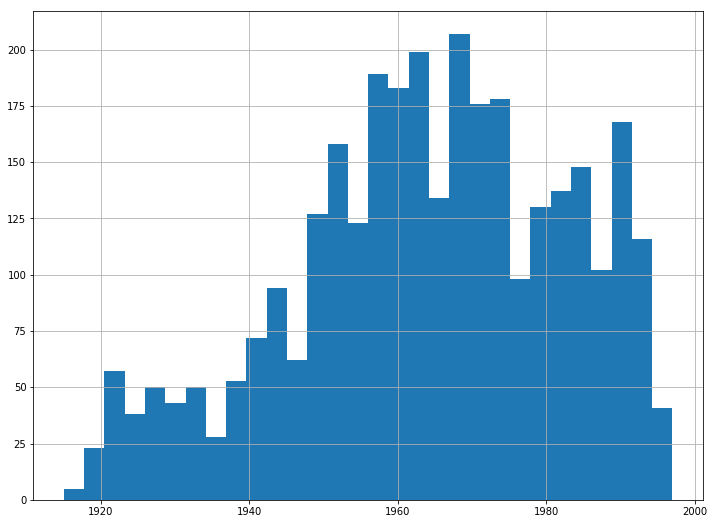

In [162]:
players.born.hist(bins=30)

Смотрим распределение игроков по росту:
    Видим, что наиболее частотный рост игроков NBA - 200 см, интересный факт, что максимальный рост игрока в базе - 230 см, а минимальный - 160 см.

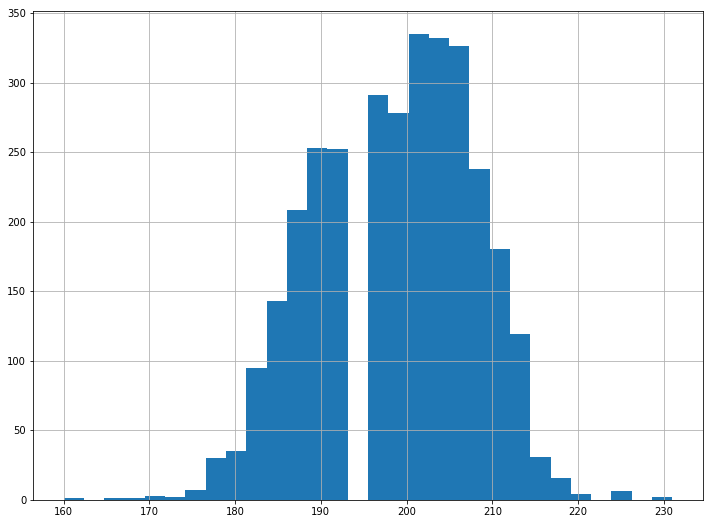

In [163]:
players.height.hist(bins=30)

Посмотрим, как менялась медиана роста у игроков разного года рождения. 
Видно, что есть какой-то всплеск в данных последнего известного года. 
По первому графику понятно, что это 1997 год и для этого года у нас меньше данных, чем за остальные года. Т.е. этот выброс можно игнорировать.

В целом видно, что есть тенденция на увеличение медианы показателя в зависимости от года рождения с 1920 года. Но темп роста замедлился примерно с 1950 года

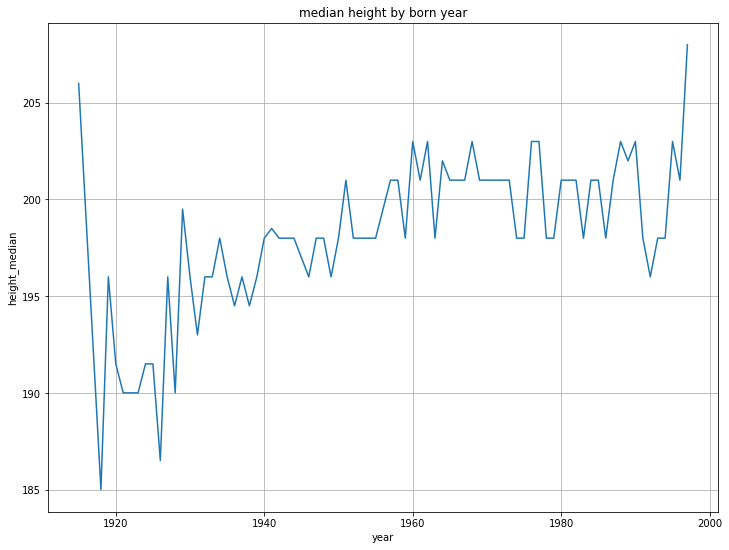

In [155]:
colleges_barh = players[['height', 'born']].groupby('born').median().reset_index().sort_values('born', ascending=False)
#colleges_barh = colleges_barh.dropna()
plt.title("median height by born year")
plt.plot(colleges_barh['born'], colleges_barh['height'])
plt.xlabel("year")
plt.ylabel("height_median")
plt.grid(True)

Изучим показатели роста по годам с 1980 года более детально.
Видно, что медианы в целом находятся вокруг 200 см, а вот 25 перцентиль в 90-х года становится выше по сравнению с 80-ми.Выбросов в данных довольно мало.

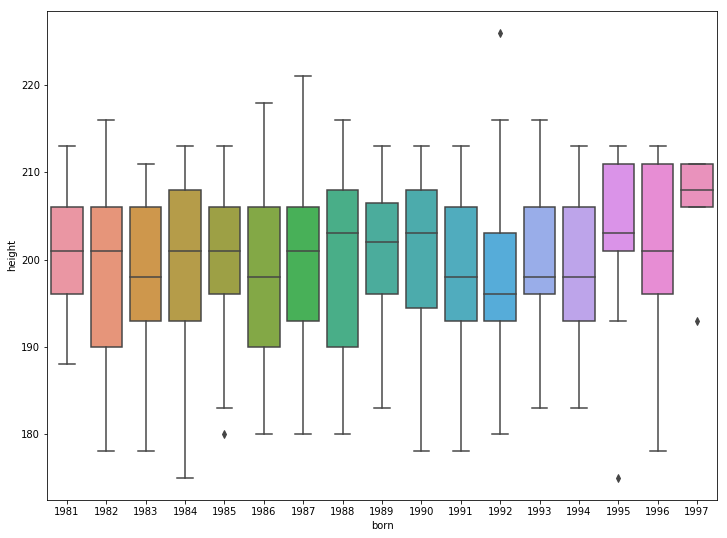

In [164]:
sns.boxplot(x="born", y="height", 
            data=players.query("born > 1980"))

посмотрим, в каком штате наиболее часто рождались игроки NBA 1990 года рождения и моложе. 
Чаще всего игроки этих лет рождались в Калифорнии

Text(0.5, 1.0, 'born states of NBA players')

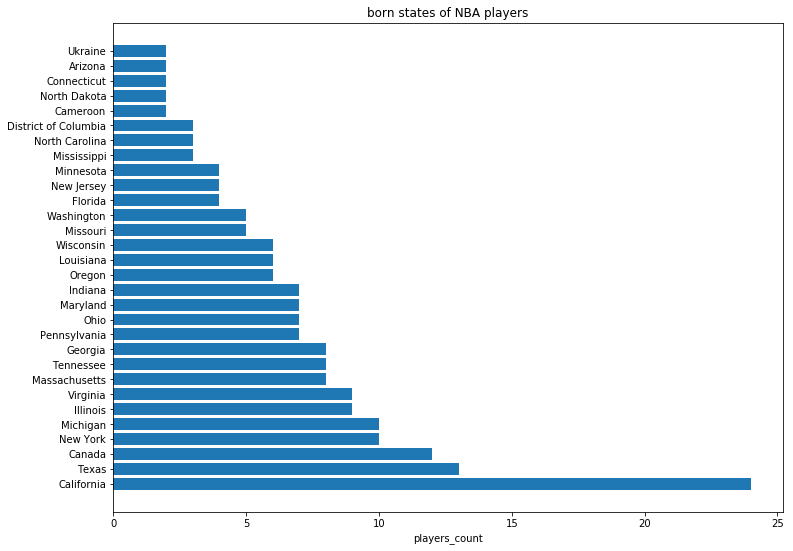

In [165]:
colleges_barh = players[['birth_state', 'born']].query('born > 1990').groupby('birth_state').count().reset_index().sort_values('born', ascending=False).head(30)
plt.barh(colleges_barh['birth_state'], colleges_barh['born'])
plt.xlabel("players_count")
plt.title("born states of NBA players")

Посмотрим топ 10 университетов, которые заканчивали игроки 1990 г.р. Здесь лидирует университет Кентуки.

([<matplotlib.patches.Wedge at 0x26815a2a9b0>,
 [Text(0.8486380994023385, 0.6998666846212833, 'University of Kentucky'),
  Text(-0.25063887569155396, 1.0710649625452575, 'Duke University'),
  Text(-0.9663635042020886, 0.525491748504446, 'University of Kansas'),
  Text(-1.0606788240315188, -0.2914797287138757, 'Syracuse University'),
  Text(-0.6998666250298572, -0.848638148547022, 'Michigan State University'),
  Text(-0.2094301491839269, -1.0798791657462414, 'University of California, Los Angeles'),
  Text(0.2506389258317228, -1.071064950812004, 'University of Michigan'),
  Text(0.6328505899326887, -0.8997222520432893, 'University of Arizona'),
  Text(0.9233020165344095, -0.597924231206173, 'University of Texas at Austin'),
  Text(1.0798791706483075, -0.20943012390753107, 'University of Nevada, Las Vegas')])

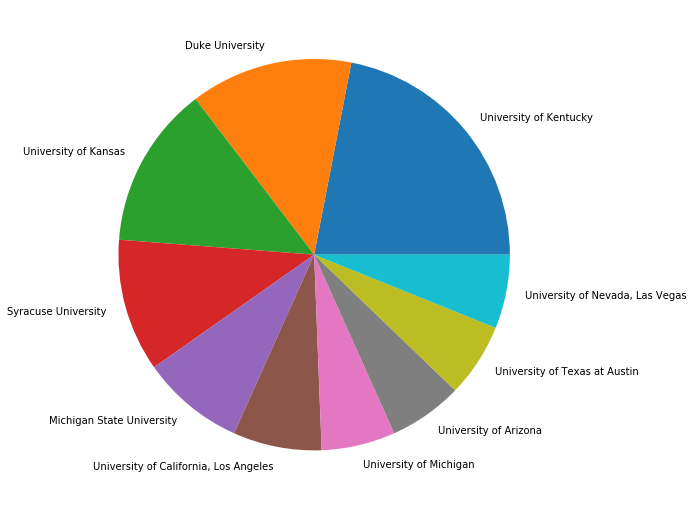

In [167]:
states = colleges_barh = players[['collage', 'born']].query('born > 1990').groupby('collage').count().reset_index().sort_values('born', ascending=False).head(10)
plt.pie(states['born'].head(10), labels= states['collage'].head(10))